In [6]:
import math
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import collections
import statistics

In [7]:
data = pd.read_csv("cosmeticreview.csv")
data["product_tags"].fillna("NORMAL", inplace = True)

data["review_label"].fillna("Unverified Buyer", inplace = True)

rate = pd.DataFrame(data)
mean_value=rate['review_rating'].mean()
data["review_rating"].fillna(value=mean_value, inplace = True)

FileNotFoundError: [Errno 2] No such file or directory: 'cosmeticreview.csv'

In [41]:
data.info()
data.size
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61276 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61284 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          61284 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

(61284, 18)

In [42]:
data.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NORMAL,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NORMAL,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NORMAL,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NORMAL,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NORMAL,https://www.nykaa.com/olay-ultra-lightweight-m...


In [43]:
data.tail()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
61279,1044490,Herbal Essences,17769058,Good,I use this thrice a week. Has helped me in mak...,Radhesh,2021-04-12 13:28:41,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61280,1044490,Herbal Essences,17766838,Great,This shampoo has a amazing fragnance and textu...,Shalini Sirohi,2021-04-12 11:47:07,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61281,1044490,Herbal Essences,17765866,Really mild and nice,"Used it for the first time, feels really fresh...",Sana kanted,2021-04-12 10:58:34,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61282,1044490,Herbal Essences,17761057,Amazing product!,One of the best shampoo which are sulphate and...,neeru chouhan,2021-04-11 21:44:55,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512,FEATURED,https://www.nykaa.com/herbal-essences-potent-a...
61283,4633369,Colorbar,25987603,Not good,It is so irritating so bad i don't like this much,Mssuhv,2022-06-20 17:41:52,2.0,False,False,Unverified Buyer,Colorbar Mogra Mist - Scent Of An India Temple...,595,417,1.5,2,NORMAL,https://www.nykaa.com/colorbar-mogra-mist-scen...


True     48222
False    13062
Name: is_a_buyer, dtype: int64


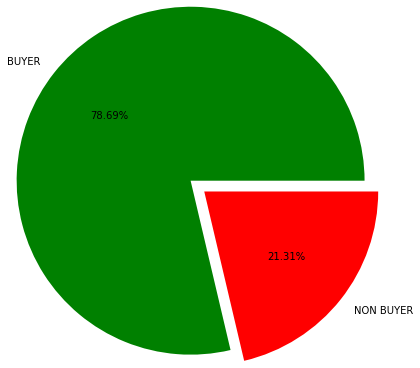

In [44]:
'''
PIE CHART
'''
#Counting the number of buyers and non buyers of products who have given a rating
print(data['is_a_buyer'].value_counts())

#Adding customizations to plot a pie chart
explode = (0.1, 0.1)
colors = ('g','r')
labels=('BUYER','NON BUYER')

# plotting the pie chart
plt.pie(data['is_a_buyer'].value_counts(), labels = labels, colors = colors, explode = explode,
        radius = 2, autopct = '%2.2f%%')

# showing the plot
plt.show()

In [55]:
'''
Dropping non buyers for genuine reviews only in further processing.
'''
data.drop(data[data.is_a_buyer == False].index, inplace =True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48222 entries, 0 to 61282
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            48222 non-null  int64  
 1   brand_name            48222 non-null  object 
 2   review_id             48222 non-null  int64  
 3   review_title          48222 non-null  object 
 4   review_text           48214 non-null  object 
 5   author                48222 non-null  object 
 6   review_date           48222 non-null  object 
 7   review_rating         48222 non-null  float64
 8   is_a_buyer            48222 non-null  bool   
 9   pro_user              48222 non-null  bool   
 10  review_label          48222 non-null  object 
 11  product_title         48222 non-null  object 
 12  mrp                   48222 non-null  int64  
 13  price                 48222 non-null  int64  
 14  product_rating        48222 non-null  float64
 15  product_rating_coun

In [54]:
Revenue_by_brand = data.groupby('brand_name')['price'].sum()
print(Revenue_by_brand)

brand_name
Herbal Essences            1896371
Kay Beauty                 6665750
L'Oreal Paris              1556117
Lakme                      1289580
Maybelline New York        2755794
NYX Professional Makeup    1224883
Nivea                       232716
Nykaa Cosmetics            4781942
Nykaa Naturals              242972
Olay                        272106
Name: price, dtype: int64


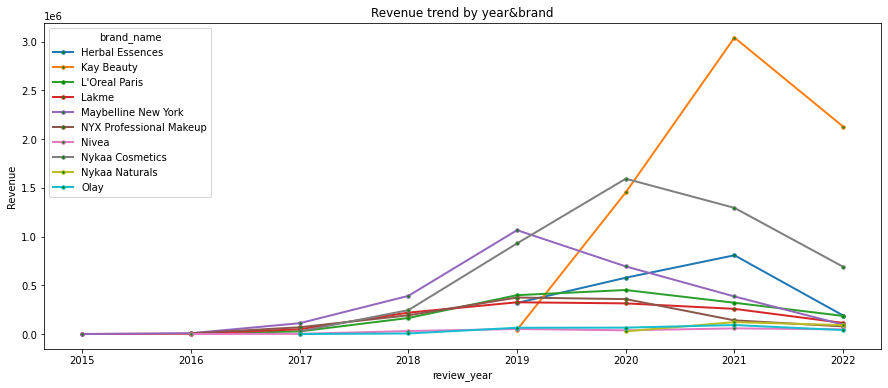

In [53]:
'''
We generate the total sale revenue by years.  
'''
# extract 'reveiw year' from 'review data' 
data['review_year']= data['review_date'].apply(lambda x:str(x)[:4])

# summary the revenue by sum the price colume.
Revenue_by_year = data.groupby(['review_year','brand_name'],as_index=False)['price'].sum()
Revenue_value = Revenue_by_year.pivot('review_year','brand_name','price')
# print(Revenue_value)

# setting data to prepare the plot.
Revenue_value.plot(figsize=(15, 6),linewidth=2, marker ='.',markerfacecolor = 'green', markersize = 7)
plt.ylabel('Revenue')
plt.title('Revenue trend by year&brand')
plt.show()

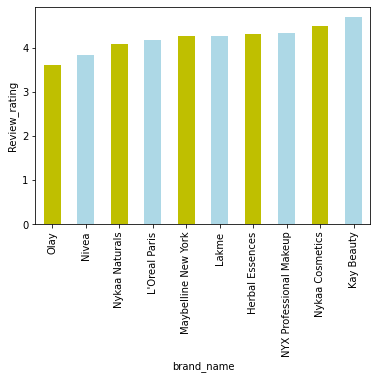

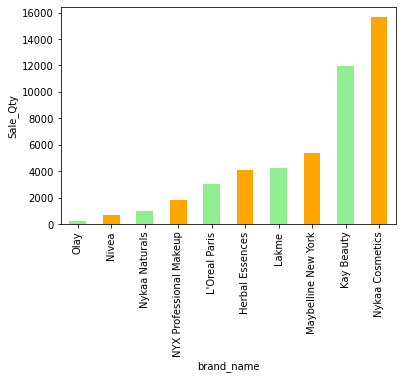

In [48]:
'''
We try to learn how is the review rating compare to different brand. And also compare the rating with the sales Qty.
'''
#Extract the avrage review rating by brand name. 
Brand_avg_rating = data.groupby('brand_name')['review_rating'].mean()
#Brand_avg_rating = data.groupby('brand_name').agg({'review_rating':'mean','price':'sum'})
#print(Brand_avg_rating)
Brand_avg_rating.sort_values().plot(kind='bar',color=['y','lightblue'])
#Plot the brand_avg_rating as bar chart
plt.ylabel('Review_rating')
#Brand_avg_rating.sort_values(by='price').plot(kind='bar',color=('b','y'))
#plt.ylabel('Reveiw_rating')
plt.show()

#Extract the sale quantity by brand. 
Sale_Qty_brand = data.groupby('brand_name')['price'].count()

Sale_Qty_brand.sort_values().plot(kind='bar',color=['lightgreen','orange'])
plt.ylabel('Sale_Qty')
plt.show()

brand_name
Herbal Essences             4131
Kay Beauty                 11946
L'Oreal Paris               3052
Lakme                       4241
Maybelline New York         5416
NYX Professional Makeup     1835
Nivea                        674
Nykaa Cosmetics            15660
Nykaa Naturals              1031
Olay                         236
Name: price, dtype: int64
brand_name
Herbal Essences            4.305156
Kay Beauty                 4.384313
L'Oreal Paris              4.051507
Lakme                      4.057180
Maybelline New York        3.993741
NYX Professional Makeup    3.960872
Nivea                      4.098220
Nykaa Cosmetics            3.939949
Nykaa Naturals             3.768671
Olay                       4.024153
Name: product_rating, dtype: float64


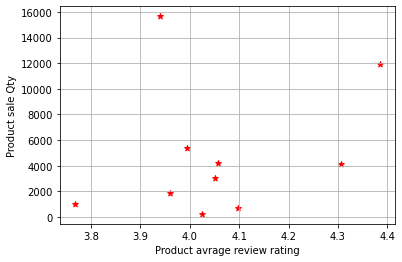

In [49]:
'''
Sales qty vs product average rating by brand --- scatter
'''

#extract sales quantity by brand
Sale_Qty_brand = data.groupby('brand_name')['price'].count()

#extract product avrage review rating by brand
Product_avg_rating = data.groupby('brand_name')['product_rating'].mean()
print(Sale_Qty_brand)
print(Product_avg_rating)

#plot scatter 
plt.scatter(x=Product_avg_rating,y=Sale_Qty_brand,color= 'r',marker ='*')
plt.xlabel('Product avrage review rating')
plt.ylabel('Product sale Qty')
plt.grid(True)

                     mean  min  25%  50%  75%  max
brand_name                                        
Herbal_Essences  4.305156  4.1  4.3  4.3  4.4  4.7
Kay_Beauty       4.384313  2.7  4.3  4.4  4.5  4.6
L_oreal_paris    4.051507  3.9  4.0  4.1  4.1  4.1
Lakme            4.057180  3.4  4.0  4.1  4.1  4.1
Maybelline_NY    3.993741  3.5  4.0  4.1  4.1  4.1
NYX_pro_makeup   3.960872  3.7  3.9  3.9  4.0  4.1
Nivea            4.098220  3.7  4.1  4.1  4.1  4.1
Nykaa_cos        3.939949  3.3  3.9  4.0  4.1  4.1
Nykaa_natural    3.768671  2.8  3.8  3.8  3.8  4.1
Olay             4.024153  3.8  4.0  4.0  4.1  4.1


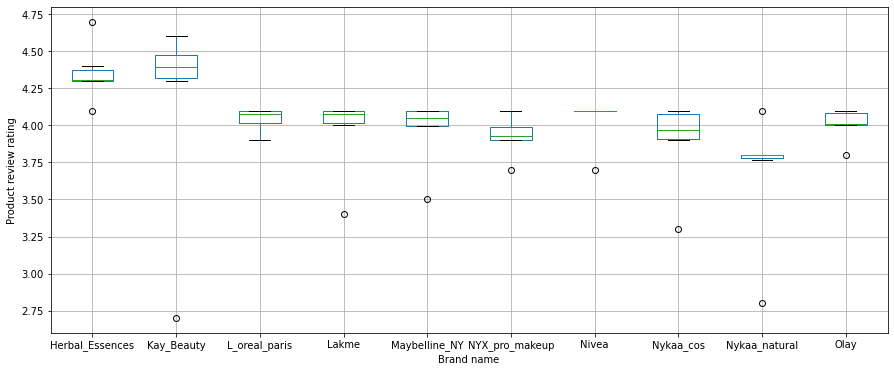

In [50]:
'''
Compare the details parameter of product review rating among all different brand.
'''
#Get the product review rating details. 
Review_rate_product = data.groupby('brand_name')['product_rating'].describe()  

#Rename the brand name.
Review_rate_product.rename(index={'Herbal Essences':'Herbal_Essences','Kay Beauty':'Kay_Beauty',"L'Oreal Paris":"L_oreal_paris", 
                                  'Maybelline New York':'Maybelline_NY','NYX Professional Makeup':'NYX_pro_makeup',
                                  'Nykaa Cosmetics':'Nykaa_cos','Nykaa Naturals':'Nykaa_natural'},inplace=True)

#Remove "count" and "std" as not needed.
del Review_rate_product['count'],Review_rate_product['std']
print(Review_rate_product)

#Set the boxplot. 
plt.figure(figsize=(15, 6))
Review_rate_product.T.boxplot()
plt.xlabel('Brand name')
plt.ylabel('Product review rating')
plt.show()

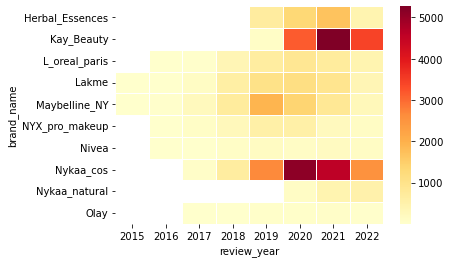

<Figure size 2400x1200 with 0 Axes>

In [51]:
'''
different brand sales qty by different year.  y is brand, x is the year, data is sale qty
'''
# extract 'reveiw year' from 'review data' 
data['review_year']= data['review_date'].apply(lambda x:str(x)[:4])

# summary the sale quantity according to brand and year.
Revenue_by_year = data.groupby(['brand_name','review_year'],as_index=False)['price'].count()
Revenue_value = Revenue_by_year.pivot('brand_name','review_year','price')
Revenue_value.rename(index={'Herbal Essences':'Herbal_Essences','Kay Beauty':'Kay_Beauty',"L'Oreal Paris":"L_oreal_paris", 
                              'Maybelline New York':'Maybelline_NY','NYX Professional Makeup':'NYX_pro_makeup',
                              'Nykaa Cosmetics':'Nykaa_cos','Nykaa Naturals':'Nykaa_natural'},inplace=True)

# setting data to prepare the plot.
sbn.heatmap(data=Revenue_value,linewidths=0.5, cmap='YlOrRd') #plt.get_cmap('Set3')
plt.figure(dpi=200,figsize=(12,6),frameon =True)
plt.show()

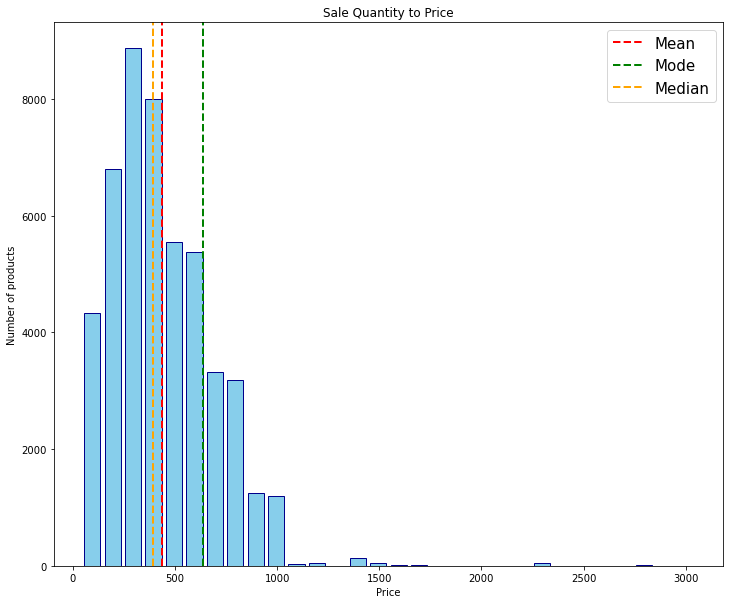

In [78]:
'''
HISTOGRAM
'''
#extract sales quantity by brand
Sale_Qty_brand = data.groupby('brand_name')['price'].count()
price_range=[]
#this will iterate  the column read in data object in index and row pair. And append each value in price
for index, row in data.iterrows():
    price_range.append(row["price"])

bin=100
maxvalue=int(bin+max(price_range))
minvalue=int(min(price_range))

mean = statistics.mean(price_range)
mode = statistics.mode(price_range)
median = statistics.median(price_range)

plt.figure(figsize=(12,10))
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode, color='green', linestyle='dashed', linewidth=2, label='Mode')
plt.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='Median')

plt.legend(prop={"size":15})

# plotting a histogram
plt.hist(price_range, range(minvalue, maxvalue, bin), color = 'skyblue',ec = 'darkblue', histtype = 'bar', rwidth = 0.8)
# x-axis label
plt.xlabel('Price')
# frequency label
plt.ylabel('Number of products')
# plot title
plt.title('Sale Quantity to Price')
# function to show the plot
plt.show()